In [1]:
from astropy.cosmology import Planck13
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import disperse
from tqdm import tqdm

from scipy.spatial import ConvexHull
from matplotlib.path import Path

In [2]:
coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)

In [3]:
cosmo = Planck13

In [4]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [5]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [6]:
# df = pd.DataFrame()
# n_gal, ra, dec, z, r_max, m200, r200 = [], [], [], [], [], [], [] 
# with open('SDSS/SDSS_DR12_optical_groups.dat') as f:
#     for line in f:
#         s = line.split()
#         n_gal.append(int(s[1]))
#         ra.append(float(s[2]))
#         dec.append(float(s[3]))
#         z.append(float(s[9]))
#         r_max.append(float(s[13]))
#         m200.append(float(s[14]))
#         r200.append(float(s[15]))
# df = df.assign(n_gal=n_gal)
# df = df.assign(RA=ra)
# df = df.assign(DEC=dec)
# df = df.assign(Z=z)
# df = df.assign(r_max=r_max)
# df = df.assign(M200=m200)
# df = df.assign(R200=r200)
# df = df[
#         (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
#         (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
#         (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
#     ]
# df.to_csv('sdss_opt_gr_filtered_RaDecZ.csv', index=False)

In [7]:
# df = pd.DataFrame()
# ra, dec, z = [], [], []
# with open('SDSS/SDSS_DR12_MGS.dat') as f:
#     for line in f:
#         s = line.split()
#         ra.append(float(s[12]))
#         dec.append(float(s[13]))
#         z.append(float(s[8]))
# df = df.assign(RA=ra)
# df = df.assign(DEC=dec)
# df = df.assign(Z=z)
# df = df[
#         (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
#         (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
#         (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
#     ]
# df.to_csv('coma_DR12_filtered_RaDecZ.csv', index=False)

In [8]:
coma_DR7 = pd.read_csv('coma_DR7_filtered_RaDecZ.csv')
coma_DR12 = pd.read_csv('coma_DR12_filtered_RaDecZ.csv')
rosat = pd.read_csv('rosat_filtered_RaDecZ.csv')
sdss_opt_gr = pd.read_csv('sdss_opt_gr_filtered_RaDecZ.csv')
sdss_opt_gr = sdss_opt_gr[sdss_opt_gr['n_gal'] >= 15]
sdss_opt_gr.reset_index(drop=True, inplace=True)



In [9]:
# coma

In [10]:
sdss_opt_gr

,n_gal,RA,DEC,Z,r_max,M200,R200
0,180,246.942018,39.401823,0.031119,1.720684,635.8440,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,221.2070,1.262930
2,101,246.935701,40.923333,0.031285,1.363890,307.1370,1.407870
3,85,247.491124,40.610586,0.029515,1.029668,147.2880,1.102600
4,34,246.010700,41.010818,0.030111,1.035922,135.6380,1.072530
...,...,...,...,...,...,...,...
217,22,247.144612,8.529292,0.032348,0.760295,54.8312,0.792467
218,22,179.565240,25.119524,0.015661,0.424296,18.0177,0.549744
219,32,211.719008,55.039101,0.006525,0.544485,19.9125,0.569996
220,15,165.703588,50.720856,0.022642,0.463985,12.5296,0.485982


In [11]:
sph2cart = 'dist'
in_cart_coords = True

In [12]:
DPS = disperse.Disperse3D(
    coma_DR12, sdss_opt_gr, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    sph2cart_f=sph2cart
)

In [13]:
DPS.count_cart_coords()

In [14]:
# CX = DPS.clusters['CX']
# CY = DPS.clusters['CY']
# CZ = DPS.clusters['CZ']

# CX_int = (CX.min(), CX.max())
# CY_int = (CY.min(), CY.max())
# CZ_int = (CZ.min(), CZ.max())

# np.random.seed(0)

# random_clusters_num = 5
# random_clusters = []
# for i in range(random_clusters_num):
#     cx = np.random.uniform(CX_int[0], CX_int[1], DPS.clusters.shape[0])
#     cy = np.random.uniform(CY_int[0], CY_int[1], DPS.clusters.shape[0])
#     cz = np.random.uniform(CZ_int[0], CZ_int[1], DPS.clusters.shape[0])
#     df = pd.DataFrame()
#     df = df.assign(CX=cx)
#     df = df.assign(CY=cy)
#     df = df.assign(CZ=cz)
#     ra, dec, z = DPS.cart2shp_ASTROPY(cx, cy, cz)
#     df = df.assign(RA=ra)
#     df = df.assign(DEC=dec)
#     df = df.assign(Z=z)
#     df = df.assign(R200=DPS.clusters['R200'])
#     random_clusters.append(df)

In [15]:
CX_int = (DPS.galaxies['CX'].min(), DPS.galaxies['CX'].max())
CY_int = (DPS.galaxies['CY'].min(), DPS.galaxies['CY'].max())
CZ_int = (DPS.galaxies['CZ'].min(), DPS.galaxies['CZ'].max())

points = np.array(DPS.galaxies[['CX', 'CY', 'CZ']])
hull = ConvexHull(points)
A, b = hull.equations[:, :-1], hull.equations[:, -1:]
# eps = np.finfo(np.float32).eps
eps = -5
def contained(x):
    return np.all(np.asarray(x) @ A.T + b.T < eps, axis=1)


np.random.seed(0)

random_clusters_num = 5
random_clusters = []
for i in range(random_clusters_num):
    CX, CY, CZ = [], [], []
    for j in tqdm(range(DPS.clusters.shape[0])):
        fl = False
        while not fl:
            cx = np.random.uniform(CX_int[0], CX_int[1], 1)[0]
            cy = np.random.uniform(CY_int[0], CY_int[1], 1)[0]
            cz = np.random.uniform(CZ_int[0], CZ_int[1], 1)[0]
            fl = contained([[cx, cy, cz]])
        CX.append(cx)
        CY.append(cy)
        CZ.append(cz)
    df = pd.DataFrame()
    df = df.assign(CX=CX)
    df = df.assign(CY=CY)
    df = df.assign(CZ=CZ)
    ra, dec, z = DPS.cart2shp_ASTROPY(CX, CY, CZ)
    df = df.assign(RA=ra)
    df = df.assign(DEC=dec)
    df = df.assign(Z=z)
    df = df.assign(R200=DPS.clusters['R200'])
    random_clusters.append(df)

100%|██████████| 222/222 [00:00<00:00, 11970.78it/s]


In [16]:
SIGMA = 5
SMOOTH = 2
BOARD = 'smooth'
ANGLE = 30

In [17]:
DPS.apply_disperse(SIGMA, SMOOTH, BOARD, ANGLE, in_cart_coords)

In [18]:
cl_conn, fils_conn = DPS.count_conn(
    sdss_opt_gr['R200'] * 5
#     random_clusters[1]
)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, None, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 2

AxesSubplot(0.125,0.125;0.775x0.755)


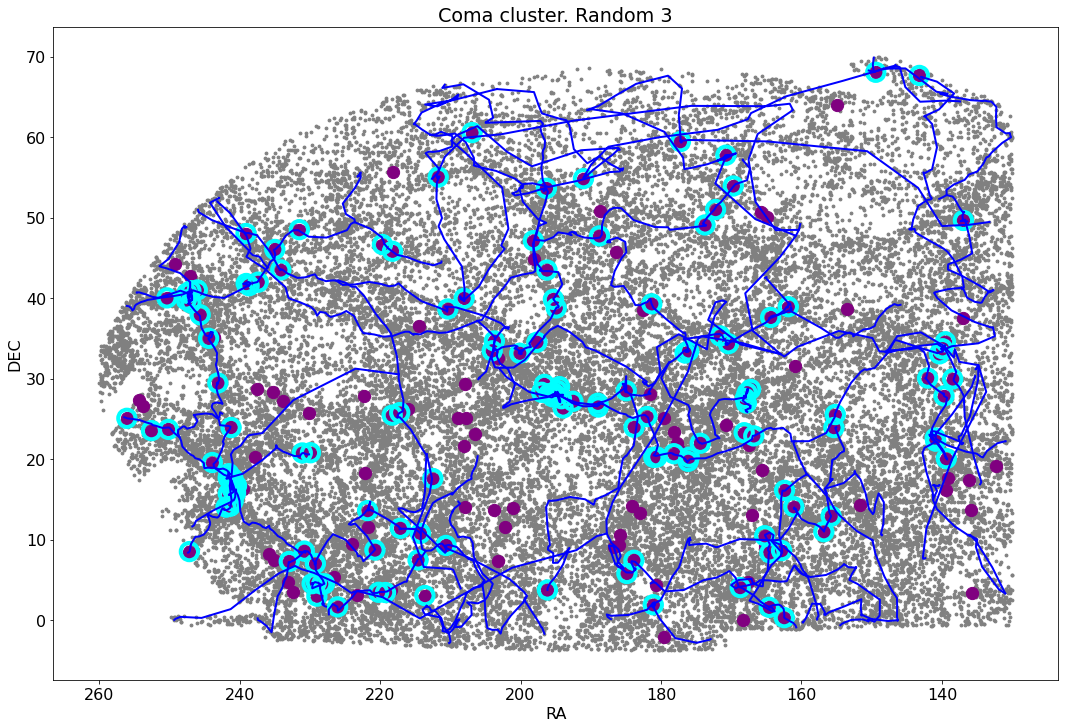

In [19]:
%matplotlib inline
fig, title = DPS.plot_2d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False, 
    title='Coma cluster. Random 3',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     clusters=random_clusters[1]
)
# plt.savefig(title + '2D.jpg')

In [20]:
# %matplotlib widget
# fig, title = DPS.plot_3d(
#     plot_cps=False, plot_only_max=False,
# #     plot_fils=False, 
#     title='Coma cluster',
#     cl_fils=list(map(lambda x: x>0, cl_conn)),
# #     clusters=random_clusters[1]
# )
# plt.savefig(title + '3D.jpg')